In [11]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

ImportError: cannot import name 'Aer' from 'qiskit' (c:\Users\durga\anaconda3\Lib\site-packages\qiskit\__init__.py)

In [15]:
qc = QuantumCircuit(9, 9)

In [16]:
qc.cx(0, 3)
qc.cx(0, 6)
qc.h(0)
qc.h(3)
qc.h(6)
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(3, 4)
qc.cx(3, 5)
qc.cx(6, 7)
qc.cx(6, 8)

In [17]:
qc.x(4)

In [18]:
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(3, 4)
qc.cx(3, 5)
qc.cx(6, 7)
qc.cx(6, 8)
qc.h(0)
qc.h(3)
qc.h(6)
qc.cx(0, 3)
qc.cx(0, 6)

In [19]:
qc.measure(range(9), range(9))

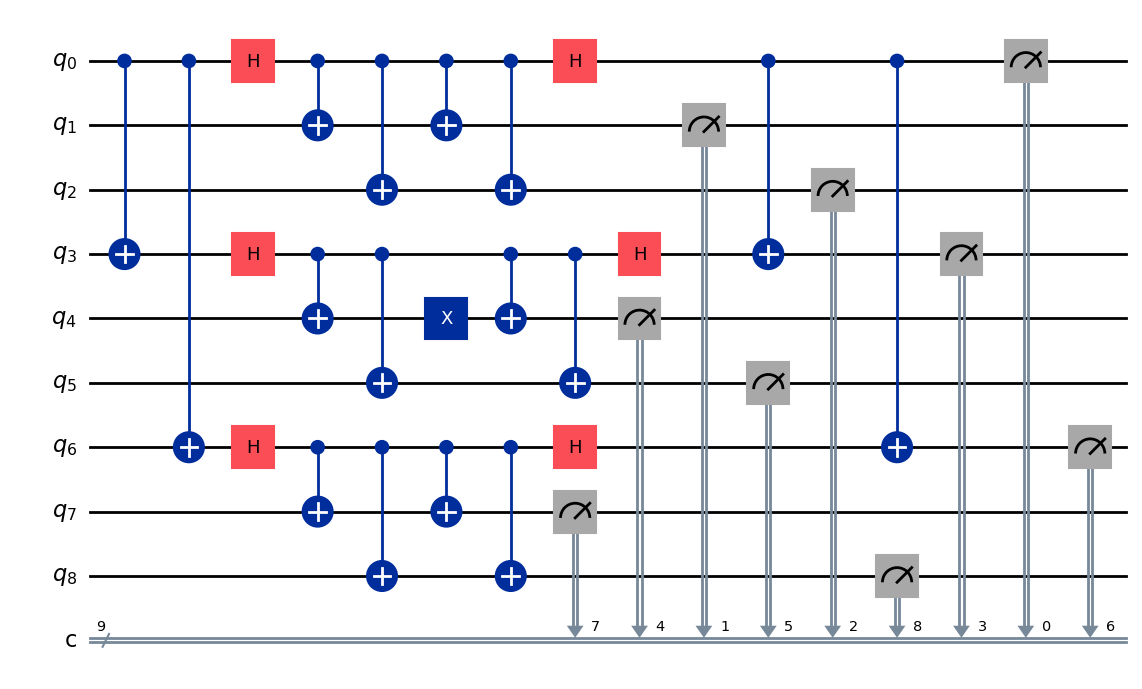

In [20]:
qc.draw('mpl')

{'11': 507, '00': 517}


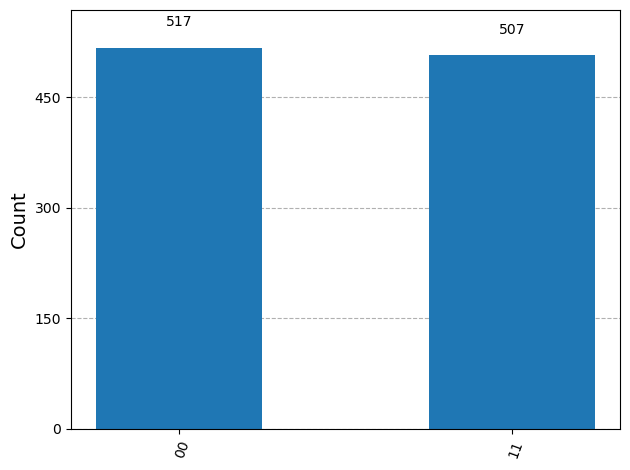

In [22]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Build a simple circuit (Bell state example)
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Use the AerSimulator (instead of Aer.get_backend)
backend = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, backend)

# Run (instead of execute)
job = backend.run(compiled_circuit, shots=1024)
result = job.result()

# Extract results
counts = result.get_counts()
print(counts)

# Plot histogram
plot_histogram(counts)


{'11': 513, '00': 511}


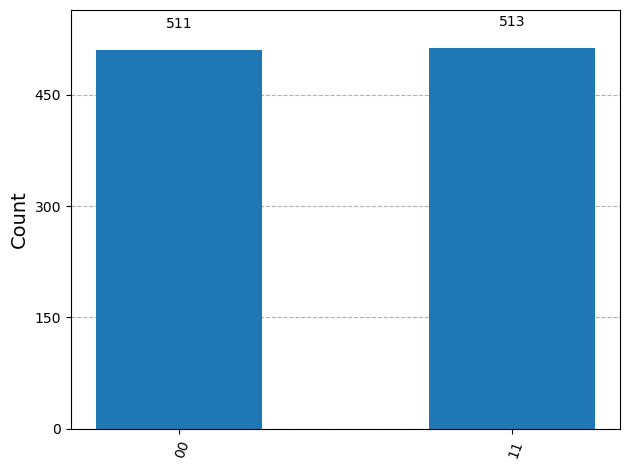

In [23]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create Bell state circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Use AerSimulator (replacement of Aer.get_backend("qasm_simulator"))
backend = AerSimulator()

# Transpile for the backend
compiled = transpile(qc, backend)

# Run (instead of execute)
job = backend.run(compiled, shots=1024)
result = job.result()

# Get counts
counts = result.get_counts()
print(counts)

# Plot histogram (same style as before)
plot_histogram(counts)


## Implementing E91 QKD in Qiskit

In [24]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

In [25]:
n = 10  

In [26]:
qc = QuantumCircuit(2 * n, 2 * n)

In [27]:
for i in range(n):
    qc.h(2 * i)  # Apply Hadamard on Alice's qubit
    qc.cx(2 * i, 2 * i + 1)  # CNOT entangles with Bob's qubit

In [28]:
alice_bases = np.random.randint(2, size=n)
bob_bases = np.random.randint(2, size=n)

In [29]:
for i in range(n):
    if alice_bases[i] == 1:
        qc.h(2 * i)  # Alice measures in diagonal basis
    if bob_bases[i] == 1:
        qc.h(2 * i + 1)  # Bob measures in diagonal basis

In [30]:
qc.measure(range(2 * n), range(2 * n))

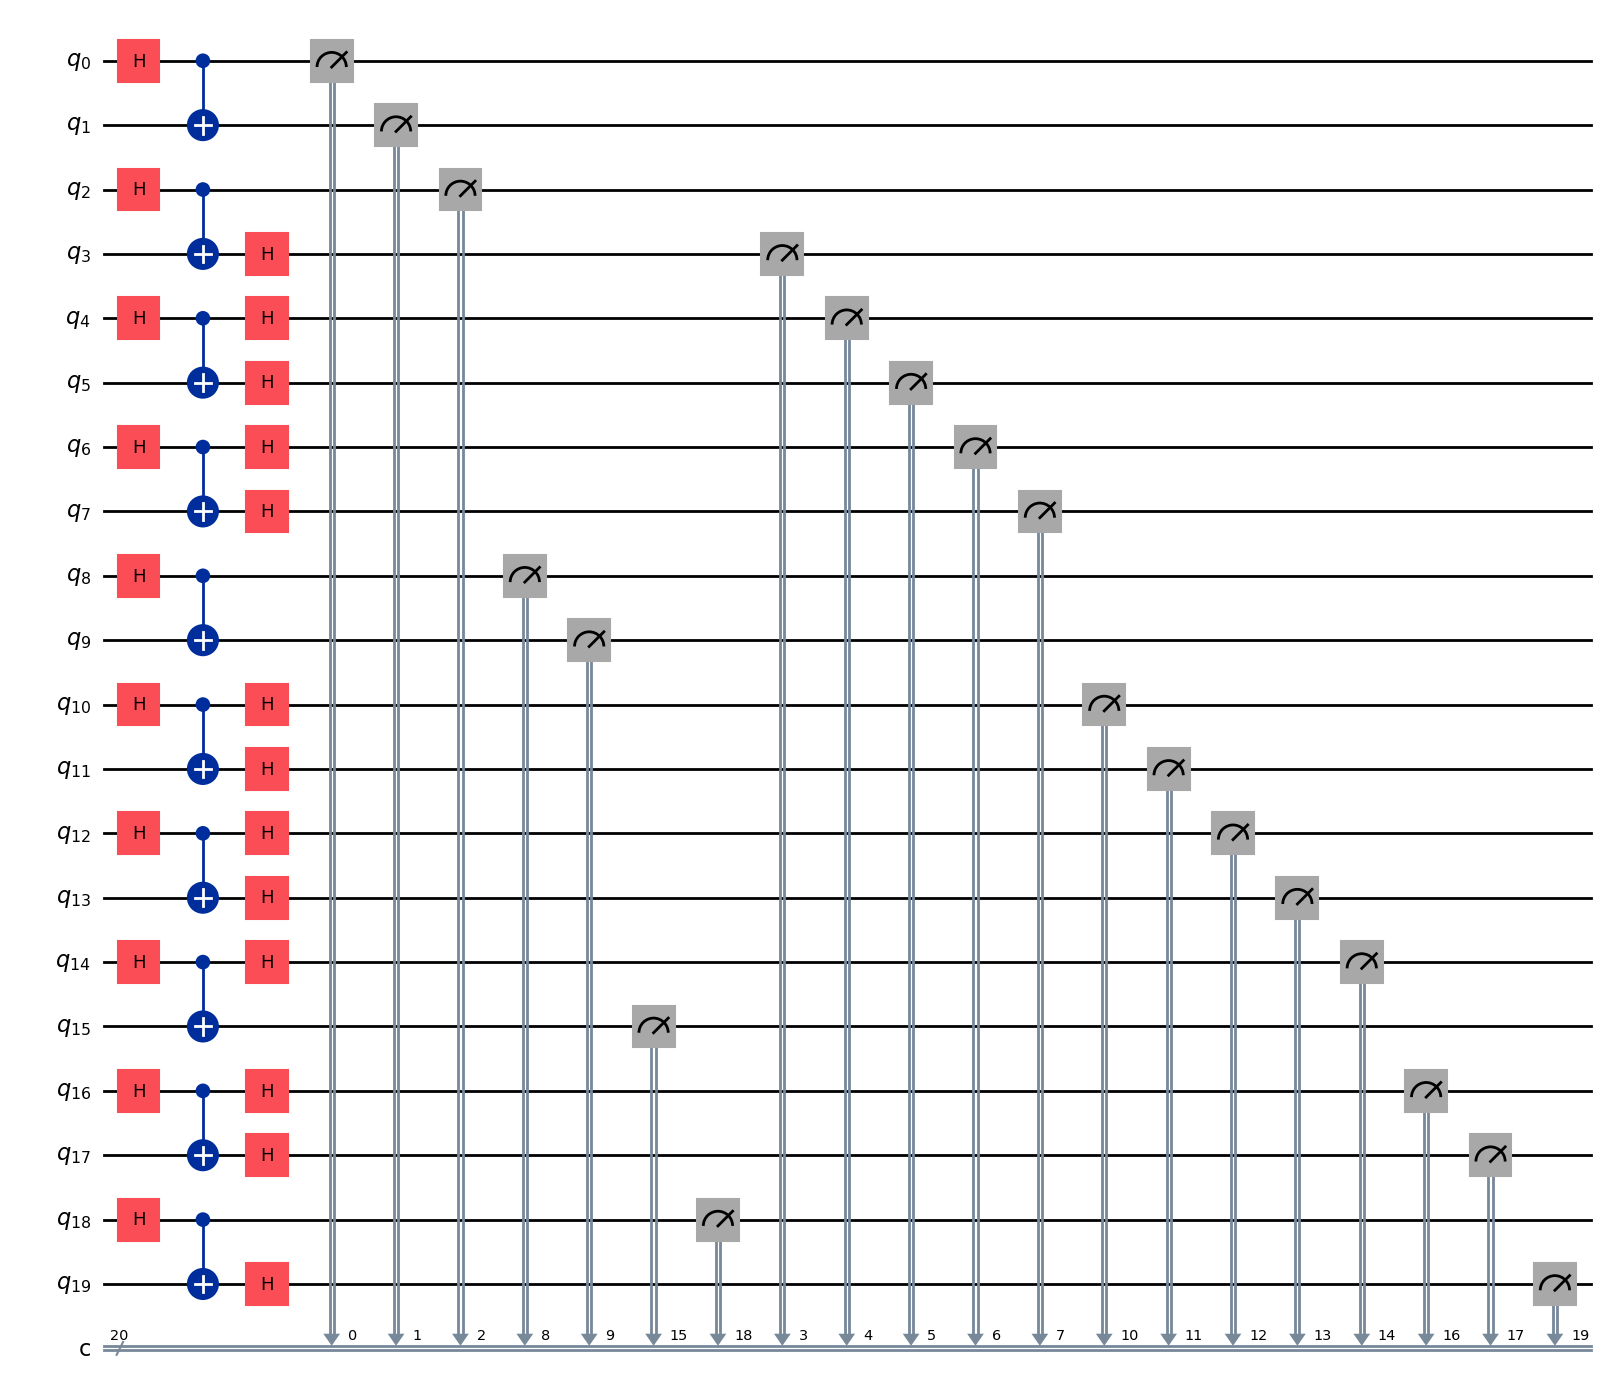

In [31]:
qc.draw('mpl')

In [13]:

import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Use AerSimulator instead of Aer.get_backend("qasm_simulator")
backend = AerSimulator()

# Transpile
compiled = transpile(qc, backend)

# Run with memory=True (bitwise outcomes)
job = backend.run(compiled, shots=1, memory=True)
result = job.result()

# Extract memory (list of bitstrings)
memory = result.get_memory()
print("Raw memory output:", memory)

# Convert to array of ints
outcomes = np.array([list(map(int, bitstring)) for bitstring in memory])
print("Numeric outcomes:", outcomes)

outcomes = np.array([list(map(int, bitstring)) for bitstring in result.get_memory()])

Raw memory output: ['11']
Numeric outcomes: [[1 1]]


In [12]:
alice_results = outcomes[0, ::2]  # Alice's qubits
bob_results = outcomes[0, 1::2]  # Bob's qubits

NameError: name 'outcomes' is not defined

In [ ]:
job = backend.run(compiled, shots=10, memory=True)
result = job.result()

# Now you'll have 10 outcomes
alice_results = np.array([list(map(int, bitstring)) for bitstring in result.get_memory()])

# Example: if you only care about one qubit (say Alice's 1st qubit)
alice_results = alice_results[:, 0]   # pick the first qubit result

print(alice_results.shape)  # should be (10,)


(10,)


In [ ]:
matching_bases = alice_bases == bob_bases
final_key = alice_results[matching_bases]

print(f"Alice's bases:  {alice_bases}")
print(f"Bob's bases:    {bob_bases}")
print(f"Alice's results:{alice_results}")
print(f"Bob's results:  {bob_results}")
print(f"Final QKD Key:  {final_key}")


Alice's bases:  [1 1 1 1 0 1 0 1 1 1]
Bob's bases:    [0 0 1 1 0 0 0 1 0 1]
Alice's results:[1 1 0 1 1 0 0 1 0 1]
Bob's results:  [1]
Final QKD Key:  [0 1 1 0 1 1]
